# Feature Engineering met Embeddings

In deze notebook genereren we embeddings voor de tekstuele features van de VKM dataset.

In [2]:
# Import benodigde libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries succesvol geladen!")

Libraries succesvol geladen!


In [3]:
# Laad de dataset
df = pd.read_csv('Uitgebreide_VKM_dataset_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nKolommen in dataset:")
print(df.columns.tolist())
print(f"\nEerste rijen:")
df.head()

Dataset shape: (211, 20)

Kolommen in dataset:
['id', 'name', 'shortdescription', 'description', 'content', 'studycredit', 'location', 'contact_id', 'level', 'learningoutcomes', 'module_tags', 'interests_match_score', 'popularity_score', 'estimated_difficulty', 'available_spots', 'start_date', 'shortdescription_clean', 'description_clean', 'content_clean', 'learningoutcomes_clean']

Eerste rijen:


,id,name,shortdescription,description,content,studycredit,location,contact_id,level,learningoutcomes,module_tags,interests_match_score,popularity_score,estimated_difficulty,available_spots,start_date,shortdescription_clean,description_clean,content_clean,learningoutcomes_clean
0,159,Kennismaking met Psychologie,"Brein, gedragsbeinvloeding, ontwikkelingspsych...",In deze module leer je hoe je gedrag van jezel...,In deze module leer je hoe je gedrag van jezel...,15,Den Bosch,58,NLQF5,A. Je beantwoordt vragen in een meerkeuze kenn...,"['brein', 'gedragsbeinvloeding', 'ontwikkeling...",0.54,319,1,79,2025-12-24,brein gedragsbeinvloeding ontwikkelingspsychol...,module leer gedrag jezelf anderen kunt begrijp...,module leer gedrag jezelf anderen kunt begrijp...,beantwoordt vragen meerkeuze kennistoets waari...
1,160,Learning and working abroad,"Internationaal, persoonlijke ontwikkeling, ver...",Studenten kiezen binnen de (stam) van de oplei...,Studenten kiezen binnen de (stam) van de oplei...,15,Den Bosch,58,NLQF5,De student toont professioneel gedrag conform ...,"['internationaal', 'persoonlijke', 'ontwikkeli...",0.92,172,5,56,2025-12-20,internationaal persoonlijke ontwikkeling verpl...,studenten kiezen binnen stam opleiding verplee...,studenten kiezen binnen stam opleiding verplee...,student toont professioneel gedrag conform ber...
2,161,Proactieve zorgplanning,"Proactieve zorgplanning, cocreatie, ziekenhuis",Het Jeroen Bosch ziekenhuis wil graag samen me...,Het Jeroen Bosch ziekenhuis wil graag samen me...,15,Den Bosch,59,NLQF5,De student past pro actieve zorgplanning toe b...,"['proactieve', 'zorgplanning', 'cocreatie', 'z...",0.78,217,5,55,2025-09-23,proactieve zorgplanning cocreatie ziekenhuis,jeroen bosch ziekenhuis graag saman opleiding ...,jeroen bosch ziekenhuis graag saman opleiding ...,student past pro actieve zorgplanning toe binn...
3,162,Rouw en verlies,"Rouw & verlies, palliatieve zorg & redeneren, ...",In deze module wordt stil gestaan bij rouw en ...,In deze module wordt stil gestaan bij rouw en ...,30,Den Bosch,58,NLQF6,De student regisseert en voert (deels) zelfsta...,"['rouw', 'verlies', 'palliatieve', 'zorg', 're...",0.69,454,1,54,2025-10-25,rouw verlies palliatieve zorg redeneren trauma...,module stil gestaan rouw verlies vanuit divers...,module stil gestaan rouw verlies vanuit divers...,student regisseert voert deels zelfstandig sam...
4,163,Acuut complexe zorg,"Acute zorg, complexiteit, ziekenhuis, revalidatie",In deze module kunnen studenten zich verdiepen...,In deze module kunnen studenten zich verdiepen...,30,Den Bosch,58,NLQF6,De student regisseert en voert (deels) zelfsta...,"['acute', 'zorg', 'complexiteit', 'ziekenhuis'...",0.40,178,5,38,2025-11-19,acute zorg complexiteit ziekenhuis revalidatie,module studenten verdiepen acuut complexe zorg...,module studenten verdiepen acuut complexe zorg...,student regisseert voert deels zelfstandig sam...


## Embeddings Genereren

We gebruiken het `sentence-transformers` model om embeddings te genereren voor de tekstuele kolommen. We gebruiken een meertalig model dat goed werkt voor Nederlandse teksten.

In [4]:
# Laad het meertalige sentence transformer model
# Dit model werkt goed voor Nederlandse teksten
print("Laden van het embedding model...")
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
print("Model succesvol geladen!")

Laden van het embedding model...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model succesvol geladen!


In [5]:
# Identificeer tekstuele kolommen voor embeddings
text_columns = [
    'shortdescription_clean',
    'description_clean', 
    'content_clean',
    'learningoutcomes_clean'
]

# Controleer welke kolommen beschikbaar zijn
available_text_cols = [col for col in text_columns if col in df.columns]
print(f"Tekstuele kolommen voor embeddings: {available_text_cols}")
print(f"\nAantal modules: {len(df)}")

Tekstuele kolommen voor embeddings: ['shortdescription_clean', 'description_clean', 'content_clean', 'learningoutcomes_clean']

Aantal modules: 211


In [6]:
# Functie om embeddings te genereren voor een kolom
def generate_embeddings(texts, column_name):
    """
    Genereer embeddings voor een lijst van teksten
    """
    # Vervang NaN waarden met lege strings
    texts = texts.fillna('').astype(str)
    
    print(f"\nGenereren van embeddings voor '{column_name}'...")
    embeddings = model.encode(texts.tolist(), show_progress_bar=True)
    
    print(f"  Shape: {embeddings.shape}")
    print(f"  Embedding dimensie: {embeddings.shape[1]}")
    
    return embeddings

# Dictionary om embeddings op te slaan
embeddings_dict = {}

# Genereer embeddings voor elke tekstkolom
for col in available_text_cols:
    embeddings_dict[col] = generate_embeddings(df[col], col)

print("\n" + "="*60)
print("Alle embeddings succesvol gegenereerd!")
print("="*60)


Genereren van embeddings voor 'shortdescription_clean'...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

  Shape: (211, 384)
  Embedding dimensie: 384

Genereren van embeddings voor 'description_clean'...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

  Shape: (211, 384)
  Embedding dimensie: 384

Genereren van embeddings voor 'content_clean'...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

  Shape: (211, 384)
  Embedding dimensie: 384

Genereren van embeddings voor 'learningoutcomes_clean'...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

  Shape: (211, 384)
  Embedding dimensie: 384

Alle embeddings succesvol gegenereerd!


## Embeddings Opslaan

We slaan de embeddings op als numpy arrays voor later gebruik.

In [7]:
# Sla embeddings op als numpy arrays
for col_name, embeddings in embeddings_dict.items():
    filename = f"{col_name}_embeddings.npy"
    np.save(filename, embeddings)
    print(f"✓ Opgeslagen: {filename} - Shape: {embeddings.shape}")

print("\n✓ Alle embeddings succesvol opgeslagen!")

✓ Opgeslagen: shortdescription_clean_embeddings.npy - Shape: (211, 384)
✓ Opgeslagen: description_clean_embeddings.npy - Shape: (211, 384)
✓ Opgeslagen: content_clean_embeddings.npy - Shape: (211, 384)
✓ Opgeslagen: learningoutcomes_clean_embeddings.npy - Shape: (211, 384)

✓ Alle embeddings succesvol opgeslagen!


## Gecombineerde Features Matrix

We combineren de embeddings van alle tekstkolommen tot één feature matrix.

In [8]:
# Combineer alle embeddings tot één feature matrix
combined_embeddings = np.concatenate(list(embeddings_dict.values()), axis=1)

print(f"Gecombineerde embeddings shape: {combined_embeddings.shape}")
print(f"  - Aantal modules: {combined_embeddings.shape[0]}")
print(f"  - Totaal aantal features: {combined_embeddings.shape[1]}")
print(f"  - Features per tekstkolom: {combined_embeddings.shape[1] // len(available_text_cols)}")

# Sla de gecombineerde embeddings op
np.save('combined_embeddings.npy', combined_embeddings)
print("\n✓ Gecombineerde embeddings opgeslagen als 'combined_embeddings.npy'")

Gecombineerde embeddings shape: (211, 1536)
  - Aantal modules: 211
  - Totaal aantal features: 1536
  - Features per tekstkolom: 384

✓ Gecombineerde embeddings opgeslagen als 'combined_embeddings.npy'


## Exploratie van Embeddings

Laten we de embeddings visualiseren en analyseren.

Statistieken van de gecombineerde embeddings:
  Min waarde: -1.4321
  Max waarde: 2.5044
  Gemiddelde: -0.0002
  Std dev: 0.1909


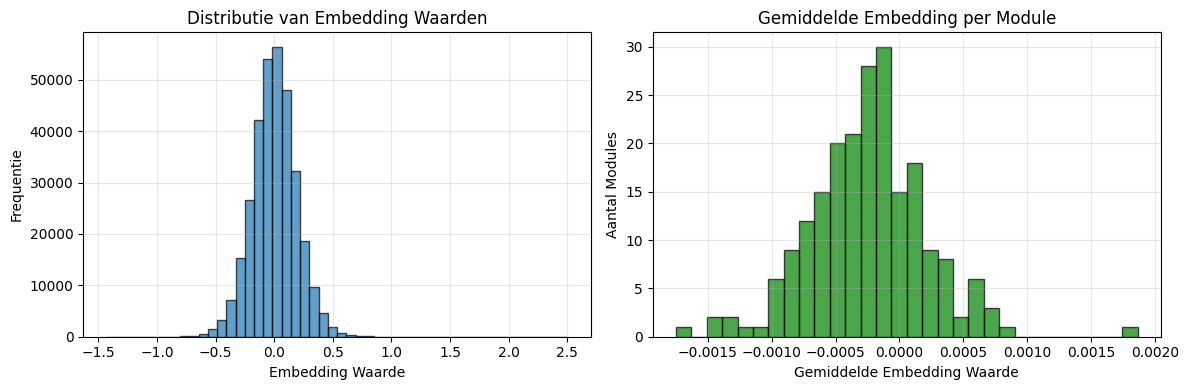

In [9]:
# Statistieken van de embeddings
print("Statistieken van de gecombineerde embeddings:")
print(f"  Min waarde: {combined_embeddings.min():.4f}")
print(f"  Max waarde: {combined_embeddings.max():.4f}")
print(f"  Gemiddelde: {combined_embeddings.mean():.4f}")
print(f"  Std dev: {combined_embeddings.std():.4f}")

# Visualiseer de distributie van embedding waarden
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(combined_embeddings.flatten(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Embedding Waarde')
plt.ylabel('Frequentie')
plt.title('Distributie van Embedding Waarden')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Gemiddelde embedding per module
mean_per_module = combined_embeddings.mean(axis=1)
plt.hist(mean_per_module, bins=30, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Gemiddelde Embedding Waarde')
plt.ylabel('Aantal Modules')
plt.title('Gemiddelde Embedding per Module')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

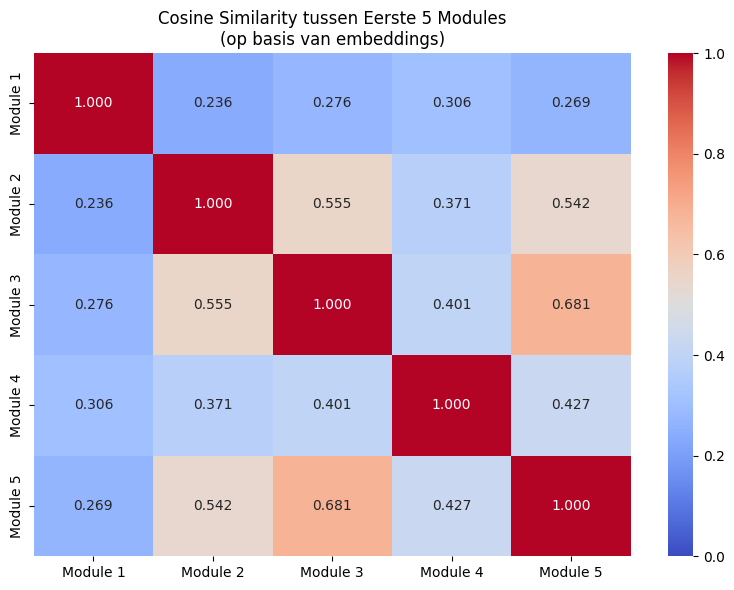


Interpretatie:
- Waarden dicht bij 1.0 betekenen zeer vergelijkbare modules
- Waarden dicht bij 0.0 betekenen verschillende modules
- Diagonaal is altijd 1.0 (module vergeleken met zichzelf)


In [10]:
# Similariteit tussen modules berekenen (op basis van de eerste 5 modules als voorbeeld)
from sklearn.metrics.pairwise import cosine_similarity

# Bereken cosine similarity voor eerste 5 modules
sample_embeddings = combined_embeddings[:5]
similarity_matrix = cosine_similarity(sample_embeddings)

# Visualiseer similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='coolwarm',
            xticklabels=[f"Module {i+1}" for i in range(5)],
            yticklabels=[f"Module {i+1}" for i in range(5)],
            vmin=0, vmax=1)
plt.title('Cosine Similarity tussen Eerste 5 Modules\n(op basis van embeddings)')
plt.tight_layout()
plt.show()

print("\nInterpretatie:")
print("- Waarden dicht bij 1.0 betekenen zeer vergelijkbare modules")
print("- Waarden dicht bij 0.0 betekenen verschillende modules")
print("- Diagonaal is altijd 1.0 (module vergeleken met zichzelf)")

## Samenvatting

We hebben nu embeddings gegenereerd voor alle tekstuele kolommen in de dataset. Deze embeddings kunnen gebruikt worden voor:
- **Clustering**: Groeperen van vergelijkbare modules
- **Aanbevelingssystemen**: Vinden van vergelijkbare modules
- **Classificatie**: Voorspellen van module eigenschappen
- **Similarity search**: Zoeken naar modules op basis van inhoud

In [ ]:
# Overzicht van gegenereerde bestanden
import os

print("=" * 60)
print("FEATURE ENGINEERING SAMENVATTING")
print("=" * 60)
print(f"\nDataset geladen: {len(df)} modules")
print(f"Tekstkolommen verwerkt: {len(available_text_cols)}")
print(f"Embedding dimensie per kolom: {list(embeddings_dict.values())[0].shape[1]}")
print(f"Totaal aantal features: {combined_embeddings.shape[1]}")

print("\n" + "=" * 60)
print("GEGENEREERDE BESTANDEN:")
print("=" * 60)

files_to_check = [
    'combined_embeddings.npy',
    'shortdescription_clean_embeddings.npy',
    'description_clean_embeddings.npy',
    'content_clean_embeddings.npy',
    'learningoutcomes_clean_embeddings.npy'
]

for file in files_to_check:
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024  # KB
        print(f"✓ {file} ({size:.1f} KB)")
    else:
        print(f"✗ {file} (niet gevonden)")

print("\n" + "=" * 60)
print("Embeddings klaar voor gebruik in clustering en modellering!")
print("=" * 60)

FEATURE ENGINEERING SAMENVATTING

✓ Dataset geladen: 211 modules
✓ Tekstkolommen verwerkt: 4
✓ Embedding dimensie per kolom: 384
✓ Totaal aantal features: 1536

GEGENEREERDE BESTANDEN:
✓ combined_embeddings.npy (1266.1 KB)
✓ shortdescription_clean_embeddings.npy (316.6 KB)
✓ description_clean_embeddings.npy (316.6 KB)
✓ content_clean_embeddings.npy (316.6 KB)
✓ learningoutcomes_clean_embeddings.npy (316.6 KB)

Embeddings klaar voor gebruik in clustering en modellering!
